In [2]:
from scipy.io import loadmat

import random  

import matplotlib.pyplot as plt

In [8]:
random.randrange(100)

24

In [12]:
mnist_raw = loadmat("../data/mnist-original.mat")
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
    }

X,y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [20]:
def plot_number_pos(n):
    print(n)
    some_digit = X[n]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(
        some_digit_image, 
        cmap = plt.cm.binary,
        interpolation="nearest")
    plt.title(y[n])
    plt.axis("off")
    plt.show()

In [13]:
def plot_number():
    limit = len(X)
    n = (random.randrange(limit))
    some_digit = X[n]
    some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(
        some_digit_image, 
        cmap = plt.cm.binary,
        
        interpolation="nearest")
    plt.title(y[n])
    plt.axis("off")
    plt.show()

In [14]:
len(X)

70000

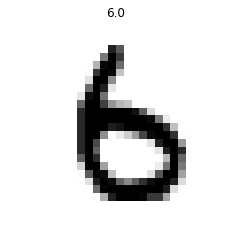

In [16]:
plot_number()

In [ ]:
#obj = col1, col2, col3,col4, ..., label = 6

50000


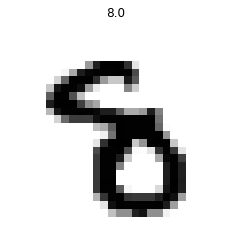

In [27]:
plot_number_pos(50000)

In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [29]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [30]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [31]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


In [32]:
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)

In [33]:
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

k-means++	1.243s	69485	0.613	0.660	0.636	0.482	0.632	0.147


In [34]:
kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

random   	0.105s	69952	0.545	0.616	0.578	0.415	0.574	0.133


In [35]:
pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

PCA-based	0.154s	74152	0.653	0.683	0.668	0.539	0.664	0.148
__________________________________________________________________________________


In [36]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


In [ ]:
#pipeline
    # get data
    # cross-validation  - train, test
    # choise models
    # fit 
    # test    